### Import Python Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

### Supress Warnings:

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Adjust Jupyter Views:

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 1. Reading & Understanding the data

### Importing the input files

In [4]:
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Inspect Data

In [6]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [10]:
NA_col = pd.DataFrame(loan_data.isnull().sum())
NA_col = NA_col.reset_index()
NA_col

,index,0
0,id,0
1,member_id,0
2,loan_amnt,0
3,funded_amnt,0
4,funded_amnt_inv,0
5,term,0
6,int_rate,0
7,installment,0
8,grade,0
9,sub_grade,0


# 2. Data Cleaning and Manipulation

### Remove columns where NA values are more than or equal to 30%

In [11]:
NA_col[0] = NA_col[0]/39717
NA_col[NA_col[0] < 0.3]

,index,0
0,id,0.000000
1,member_id,0.000000
2,loan_amnt,0.000000
3,funded_amnt,0.000000
4,funded_amnt_inv,0.000000
5,term,0.000000
6,int_rate,0.000000
7,installment,0.000000
8,grade,0.000000
9,sub_grade,0.000000


In [12]:
col_list = NA_col['index'].to_list()
df = loan_data[col_list]
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Remove irrelevant columns.
Now let's look at each column from business perspective if that is required or not for our analysis such as Unique ID's, URL. As last 2 digits of zip code is masked 'xx', we can remove that as well.

In [13]:
not_required_columns = ["id","member_id","url","zip_code"]
df.drop(not_required_columns, axis =1, inplace=True)
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=107)

In [15]:
(df.purpose.value_counts()*100)/len(df)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

Purpose of loan : Drop records where values are less than 0.75% We will analyse only those categories which contain more than 0.75% of records. Also, we are not aware what comes under 'Other' we will remove this category as well.

In [19]:
df = df[~((df['purpose'] == 'renewable_energy') | (df['purpose'] == 'other'))]

print("So now we are left with",df.shape ,"rows & columns.")
print(df.purpose.unique())

So now we are left with (35621, 107) rows & columns.
['credit_card' 'car' 'small_business' 'wedding' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical' 'moving' 'vacation' 'house'
 'educational']


In [20]:
(df.loan_status.value_counts()*100)/len(df)

Fully Paid     83.195306
Charged Off    13.966480
Current         2.838213
Name: loan_status, dtype: float64

# 3. Derived Metrics

We will now derive some new columns based on our business understanding that will be helpful in our analysis.


**1. Loan amount to Annual Income ratio**

In [25]:
df['loan_income_ratio']= df['loan_amnt']/df['annual_inc']
df['loan_income_ratio'].head()

0    0.208333
1    0.083333
2    0.195886
5    0.138889
6    0.148923
Name: loan_income_ratio, dtype: float64

**2. Extract Year & Month from Issue date**

In [29]:
df['issue_month'],df['issue_year'] = df['issue_d'].str.split('-', 1).str
df[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
5,Dec-11,Dec,11
6,Dec-11,Dec,11


**3. Remove '%' from int_rate column**

In [31]:
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate']  = df['int_rate'].astype('float')
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
5     7.90
6    15.96
Name: int_rate, dtype: float64

# 4. Univariate Analysis

Continuous Variables In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot etc.

Categorical Variables For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

### Continuous Variables

1. Loan Amount

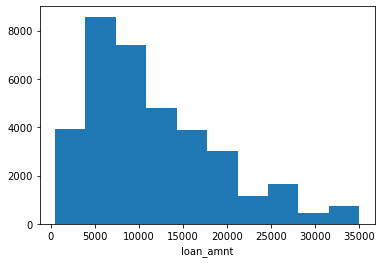

In [33]:
plt.hist(df['loan_amnt'])
plt.xlabel('loan_amnt')
plt.show()

### Insights: Most of the loan amounts are distributed between 5000 to 10000 USD.

2. Interest Rate

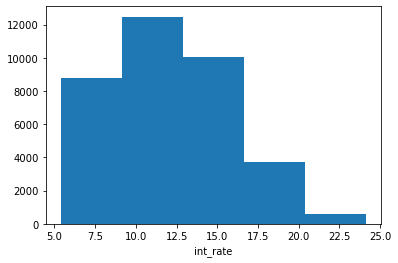

In [36]:
plt.hist(df['int_rate'],bins=5)
plt.xlabel('int_rate')
plt.show()

### Insights: Most of the loans interest rates are distributed between 10% to 16%.

3. Annual Income

In [37]:
df["annual_inc"].value_counts()

60000.0    1367
50000.0     963
40000.0     794
65000.0     753
45000.0     751
           ... 
45314.0       1
53913.0       1
62880.0       1
37596.0       1
27376.0       1
Name: annual_inc, Length: 4824, dtype: int64

In [38]:
df["annual_inc"].describe()

count    3.562100e+04
mean     6.959688e+04
std      6.500998e+04
min      4.000000e+03
25%      4.160000e+04
50%      6.000000e+04
75%      8.300400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

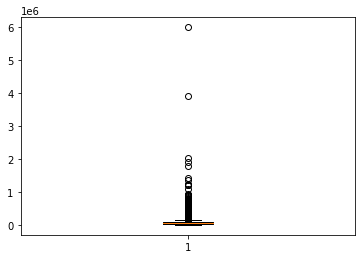

In [39]:
plt.boxplot(df["annual_inc"])
plt.show()

### Max value is 6000000 which is too large than mean value, so we will remove the outliers from Annual Income.

#### Remove Outliers (values from 99 to 100%)

In [40]:
q = df["annual_inc"].quantile(0.995)
df = df[df["annual_inc"] < q]
df["annual_inc"].describe()

count     35417.000000
mean      66946.761494
std       37318.468774
min        4000.000000
25%       41325.000000
50%       60000.000000
75%       82140.000000
max      294000.000000
Name: annual_inc, dtype: float64

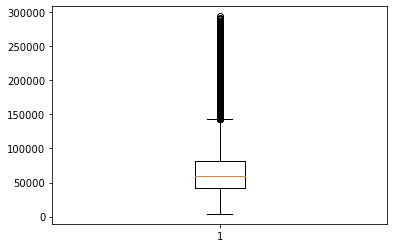

In [41]:
plt.boxplot(df["annual_inc"])
plt.show()

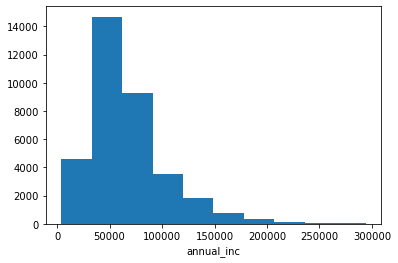

In [42]:
plt.hist(df["annual_inc"])
plt.xlabel('annual_inc')
plt.show()

### Insights: Most of the applicants earns beteen 40000 to 90000 USD annually.

## Categorical Variables

4. Loan Status

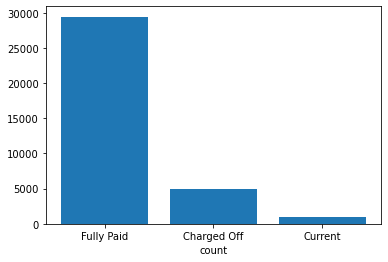

In [43]:
loan_status = pd.DataFrame(df['loan_status'].value_counts()).reset_index()
plt.bar(loan_status['index'],loan_status['loan_status'])
plt.xlabel('loan_status')
plt.xlabel('count')
plt.show()

### Insights: 5% of the applicants Charged off.

5. Purpose of loan

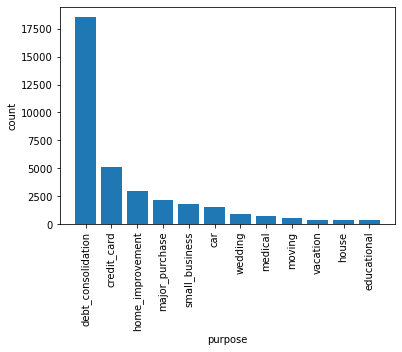

In [44]:
loan_purpose = pd.DataFrame(df['purpose'].value_counts()).reset_index()
plt.bar(loan_purpose['index'],loan_purpose['purpose'])
plt.xlabel('purpose')
plt.ylabel('count')
plt.xticks(loan_purpose['index'], rotation='vertical')
plt.show()

### Insights: Approx 60% of the applicants applied loan for paying their other loans(Debt Consolidation)

6. Home Ownership wise Loan

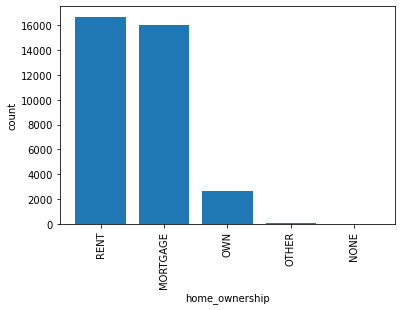

In [45]:
home_ownership = pd.DataFrame(df['home_ownership'].value_counts()).reset_index()
plt.bar(home_ownership['index'],home_ownership['home_ownership'])
plt.xlabel('home_ownership')
plt.ylabel('count')
plt.xticks(home_ownership['index'], rotation='vertical')
plt.show()

### Insights: Most of applicants are living in rented home and mortagaged their home

7. Year wise Loan

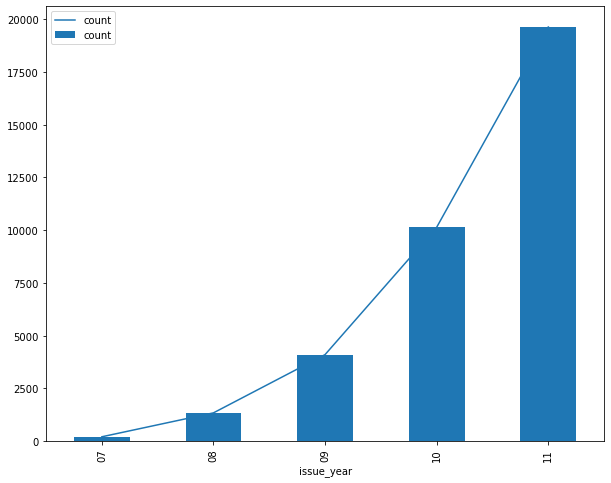

In [46]:
year_wise =df.groupby(by= [df.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(10,8),ax = ax)
plt.show()

### Insights: loan applicants are increasing year on year, approx 47% of loan applicants received loans in 2011

8. Loan Term

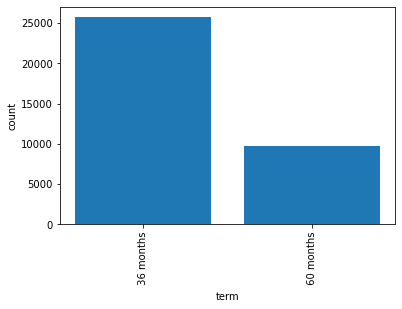

In [48]:
term = pd.DataFrame(df['term'].value_counts()).reset_index()
plt.bar(term['index'],term['term'])
plt.xlabel('term')
plt.ylabel('count')
plt.xticks(term['index'], rotation='vertical')
plt.show()

### Insights: 70% of applicants applied loan for 36 months term period

# Bivariate/Multivariate Analysis

Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

1. Correlation Matrix : All Continuos(Numeric) Variables

In [49]:
loan = df[['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','loan_income_ratio']]
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_income_ratio
loan_amnt,1.000000,0.980978,0.939152,0.319560,0.927105,0.418004,0.075798,0.612737
funded_amnt,0.980978,1.000000,0.957878,0.323282,0.954045,0.413501,0.075339,0.600479
funded_amnt_inv,0.939152,0.957878,1.000000,0.316265,0.902134,0.395528,0.082125,0.571571
int_rate,0.319560,0.323282,0.316265,1.000000,0.291792,0.080874,0.115283,0.223523
installment,0.927105,0.954045,0.902134,0.291792,1.000000,0.418025,0.062485,0.548319
annual_inc,0.418004,0.413501,0.395528,0.080874,0.418025,1.000000,-0.125662,-0.320269
dti,0.075798,0.075339,0.082125,0.115283,0.062485,-0.125662,1.000000,0.154804
loan_income_ratio,0.612737,0.600479,0.571571,0.223523,0.548319,-0.320269,0.154804,1.000000


2. HeatMap: All continuos variables

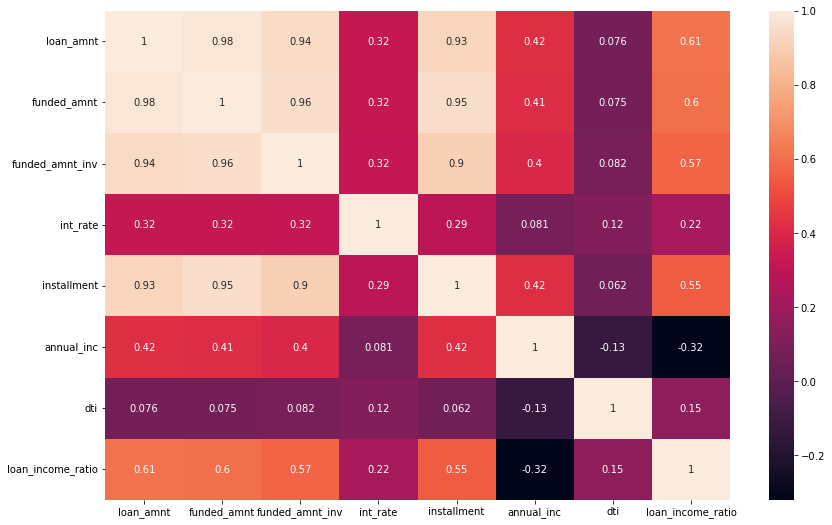

In [50]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

### Insights: It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.So we can take any one column out of them for our analysis

3. Annual Income Range vs Probability Charge Off

In [56]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=slot)
loan_df = df[['loan_status', 'annual_inc_range']]
loan_df = pd.DataFrame(loan_df.groupby(['annual_inc_range','loan_status'])['loan_status'].count())
loan_df = loan_df.rename({'loan_status':'count'}, axis=1)
loan_df = loan_df.reset_index()
df_ =  pd.pivot_table(loan_df, index='annual_inc_range',columns='loan_status', values='count')
df_

loan_status,Charged Off,Current,Fully Paid
annual_inc_range,,,
0-25000,387,19,1711
25000-50000,1869,285,9551
50000-75000,1529,326,9058
75000-100000,672,198,4829
100000 and above,497,179,4307


In [57]:
df_['All'] = df_['Charged Off'] +  df_['Current'] +  df_['Fully Paid']
df_

loan_status,Charged Off,Current,Fully Paid,All
annual_inc_range,,,,
0-25000,387,19,1711,2117
25000-50000,1869,285,9551,11705
50000-75000,1529,326,9058,10913
75000-100000,672,198,4829,5699
100000 and above,497,179,4307,4983


So we will be using a new term now Probability of Charged Off that will be equal to :

Probability of Charged Off = Number of Applicants who charged off / Total No.of Applicants

In [58]:
df_['Probability of Charged Off'] = df_['Charged Off']/df_['All']
df_

loan_status,Charged Off,Current,Fully Paid,All,Probability of Charged Off
annual_inc_range,,,,,
0-25000,387,19,1711,2117,0.182806
25000-50000,1869,285,9551,11705,0.159675
50000-75000,1529,326,9058,10913,0.140108
75000-100000,672,198,4829,5699,0.117915
100000 and above,497,179,4307,4983,0.099739


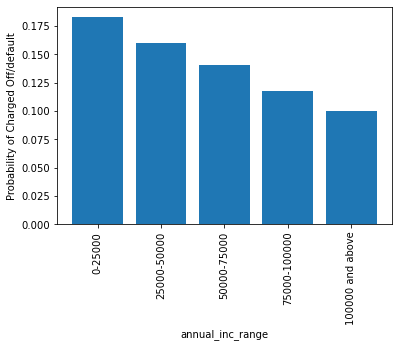

In [59]:
plt.bar(slot, df_['Probability of Charged Off'])
plt.xlabel('annual_inc_range')
plt.ylabel('Probability of Charged Off/default')
plt.xticks(rotation='vertical')
plt.show()

### Insights: As the annual income is decreasing the probability that person will default is increasing with highest at (0 to 25000) salary bracket.

In [60]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels=slot)
loan_df = df[['loan_status', 'int_rate_range']]
loan_df = pd.DataFrame(loan_df.groupby(['int_rate_range','loan_status'])['loan_status'].count())
loan_df = loan_df.rename({'loan_status':'count'}, axis=1)
loan_df = loan_df.reset_index()
df_ =  pd.pivot_table(loan_df, index='int_rate_range',columns='loan_status', values='count')
df_

loan_status,Charged Off,Current,Fully Paid
int_rate_range,,,
0-7.5,224,5,4581
7.5-10,482,59,5672
10-12.5,1092,238,7247
12.5-15,1288,231,6593
15 and above,1598,387,4932


In [61]:
df_['All'] = df_['Charged Off'] +  df_['Current'] +  df_['Fully Paid']
df_

loan_status,Charged Off,Current,Fully Paid,All
int_rate_range,,,,
0-7.5,224,5,4581,4810
7.5-10,482,59,5672,6213
10-12.5,1092,238,7247,8577
12.5-15,1288,231,6593,8112
15 and above,1598,387,4932,6917


In [62]:
df_['Probability of Charged Off'] = df_['Charged Off']/df_['All']
df_

loan_status,Charged Off,Current,Fully Paid,All,Probability of Charged Off
int_rate_range,,,,,
0-7.5,224,5,4581,4810,0.046570
7.5-10,482,59,5672,6213,0.077579
10-12.5,1092,238,7247,8577,0.127317
12.5-15,1288,231,6593,8112,0.158777
15 and above,1598,387,4932,6917,0.231025


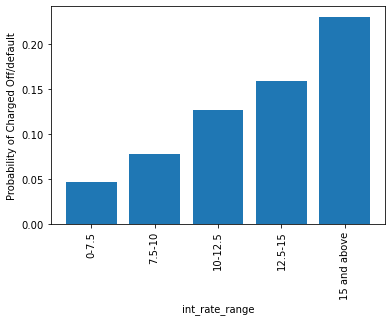

In [63]:
plt.bar(slot, df_['Probability of Charged Off'])
plt.xlabel('int_rate_range')
plt.ylabel('Probability of Charged Off/default')
plt.xticks(rotation='vertical')
plt.show()

### Insights: As the interest rate is increasing the probability that person will default is increasing with highest of 9% at 15% & above bracket